<a href="https://colab.research.google.com/github/anurag-mk/PredictiveAnalystics/blob/main/Homework2_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-plot

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from mlxtend.data import mnist_data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
import scikitplot as skplt

In [3]:
data = pd.read_csv("/content/car.data", names = ['buying','maint','doors','persons','lug_boot','safety','Class'])

In [4]:
data

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
data.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [6]:
data.maint.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [7]:
data.doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [8]:
data.persons.unique()

array(['2', '4', 'more'], dtype=object)

In [9]:
data.lug_boot.unique()

array(['small', 'med', 'big'], dtype=object)

In [10]:
data.safety.unique()

array(['low', 'med', 'high'], dtype=object)

In [11]:
data.Class.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [12]:
#data['doors]= data['doors].apply(lambda x: 5 if x == '5more')
data['doors'] = data['doors'].replace(['5more'],5)
data['persons'] = data['persons'].replace(['more'],5)
data

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5,5,med,med,good
1724,low,low,5,5,med,high,vgood
1725,low,low,5,5,big,low,unacc
1726,low,low,5,5,big,med,good


**One Hot Encoding**


In [13]:
# One hot encoding 
cat_cols = ['buying', 'maint', 'lug_boot','safety']


for column in cat_cols:
  dummies_df = pd.get_dummies(data[column], prefix=column)
  data = pd.merge(
      left=data,
      right=dummies_df,
      left_index=True,
      right_index=True,
  )


data_ml = data.drop(columns=cat_cols)
print(data_ml)



     doors persons  Class  ...  safety_high  safety_low  safety_med
0        2       2  unacc  ...            0           1           0
1        2       2  unacc  ...            0           0           1
2        2       2  unacc  ...            1           0           0
3        2       2  unacc  ...            0           1           0
4        2       2  unacc  ...            0           0           1
...    ...     ...    ...  ...          ...         ...         ...
1723     5       5   good  ...            0           0           1
1724     5       5  vgood  ...            1           0           0
1725     5       5  unacc  ...            0           1           0
1726     5       5   good  ...            0           0           1
1727     5       5  vgood  ...            1           0           0

[1728 rows x 17 columns]


In [14]:
print(data_ml)

     doors persons  Class  ...  safety_high  safety_low  safety_med
0        2       2  unacc  ...            0           1           0
1        2       2  unacc  ...            0           0           1
2        2       2  unacc  ...            1           0           0
3        2       2  unacc  ...            0           1           0
4        2       2  unacc  ...            0           0           1
...    ...     ...    ...  ...          ...         ...         ...
1723     5       5   good  ...            0           0           1
1724     5       5  vgood  ...            1           0           0
1725     5       5  unacc  ...            0           1           0
1726     5       5   good  ...            0           0           1
1727     5       5  vgood  ...            1           0           0

[1728 rows x 17 columns]


In [15]:
dataTarget = data_ml['Class']
data_ml = data_ml.drop(['Class'], axis ='columns')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_ml, dataTarget, test_size = 0.3, random_state = 7)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1209, 16)
(519, 16)
(1209,)
(519,)


In [18]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns= X_test.columns)

### Models

In [19]:
dt = DecisionTreeClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = svm.SVC(probability = True)

In [20]:
# Grid for algorithms
dt_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

lr_grid = {'penalty' : ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

k_range = list(range(1, 31))
knn_grid = {'weights':  ['uniform','distance'], 'n_neighbors' : k_range}

svc_grid = {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
            'kernel': ['rbf']}

In [21]:
inner_cv = KFold(n_splits=4, shuffle=True, random_state = 7)
outer_cv = KFold(n_splits=4, shuffle=True, random_state = 7)
scoring = 'accuracy'

In [22]:
dt_clf = GridSearchCV(estimator=dt, param_grid = dt_grid, scoring = scoring, cv = inner_cv)
lr_clf = GridSearchCV(estimator=lr, param_grid = lr_grid, scoring = scoring, cv = inner_cv)
knn_clf = GridSearchCV(estimator=knn, param_grid = knn_grid, scoring = scoring, cv = inner_cv)
svc_clf = GridSearchCV(estimator=svc, param_grid = svc_grid, scoring = scoring, cv = inner_cv)

In [23]:
dt_scores = cross_val_score(dt_clf, X = X_train, y = y_train, cv = outer_cv)
dt_score = dt_scores.mean()
lr_scores = cross_val_score(lr_clf, X = X_train, y = y_train, cv = outer_cv)
lr_score = lr_scores.mean()
knn_scores = cross_val_score(knn_clf, X = X_train, y = y_train, cv = outer_cv)
knn_score = knn_scores.mean()
svc_scores = cross_val_score(svc_clf, X = X_train, y = y_train, cv = outer_cv)
svc_score = svc_scores.mean()

In [24]:
print(' Accuracy Decision Tree is ', dt_score)
print(' Accuracy Logistic Regression is ', lr_score)
print(' Accuracy K nearnest neighbors is ', knn_score)
print(' Accuracy Support vector is ', svc_score)

 Accuracy Decision Tree is  0.9454216116975936
 Accuracy Logistic Regression is  0.8808384149673245
 Accuracy K nearnest neighbors is  0.9114730181627434
 Accuracy Support vector is  0.9660787270780058


In [25]:
#Fitting the best performing model interms of accuracy i.e. SVC
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
predicted_probas = svc_clf.predict_proba(X_test)
y_test.shape

(519,)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.97      1.00      0.98       112
        good       1.00      0.76      0.87        17
       unacc       1.00      1.00      1.00       363
       vgood       0.93      0.93      0.93        27

    accuracy                           0.99       519
   macro avg       0.97      0.92      0.94       519
weighted avg       0.99      0.99      0.99       519



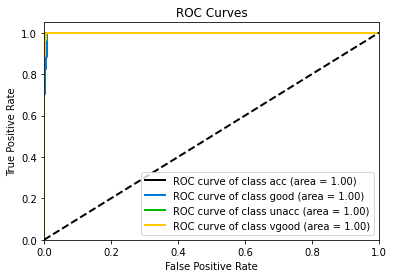

In [29]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas, plot_micro =False, plot_macro = False)


In [30]:
predicted_probas

array([[9.31571968e-03, 5.48469363e-05, 9.90629155e-01, 2.78504078e-07],
       [3.11550529e-13, 1.67314278e-13, 9.99999925e-01, 7.44998016e-08],
       [2.95904554e-14, 1.58923229e-14, 9.99999967e-01, 3.33363076e-08],
       ...,
       [1.40410615e-07, 6.97527365e-08, 9.99831676e-01, 1.68114228e-04],
       [9.78701254e-01, 5.91620534e-03, 2.35055690e-03, 1.30319834e-02],
       [9.64092972e-01, 1.89582644e-03, 3.39438608e-02, 6.73404557e-05]])